# Checking Airborne Radar Echo Sounding data

Author: Alice Fremand (@almand) & Julien Bodart (@julbod)

Date: 12/11/2021

## Aim

The goal of this tutorial is to easily check radar echo sounding data from either NetCDF or SEG-Y formatted files.

### Virtual environment

For the code to run, it is important to install the correct dependancies and libraries. In particular the following libraries are crucial for the code to run: 

* netCDF4 *module to check NetCDF data in python*
* obspy *module to check SEGY data in python*


### To set up the virtual environment with Conda:
```
>conda create -n aerogeophysics_env
>conda activate aerogeophysics_env
>conda config --env --add channels conda-forge
>conda config --env --set channel_priority strict
>conda install python=3 obspy
>conda install netCDF4
```

### To set up the virtual environment on UNIX: 
Load your python module:

`module load python/conda3`

Then in the folder where you have your code, you need to launch:

`python3 -m venv aerogeophysics_env`

It will create a folder with all the environment for python.
To activate the virtual environment you need to lauch it:

```
source aerogeophysics_env/bin/activate.csh
```

You need to make sure that [aerogeophysics_env] appears before your name on the machine. That means that you are using the virtual environment
Then you need to upgrade pip which is the command that install the packages

`python3 -m pip install --upgrade pip`

And install the other libraries

`python3 -m pip install obspy`

In this tutorial, the virtual environment is already set up. The list of the current libraries loaded is given in the list below.

In [258]:
pip list

Package                       Version
----------------------------- -------------------
affine                        2.3.0
alabaster                     0.7.12
anyio                         3.3.3
appdirs                       1.4.4
argh                          0.26.2
argon2-cffi                   21.1.0
arrow                         1.1.0
astroid                       2.5.8
async-generator               1.10
atomicwrites                  1.4.0
attrs                         21.2.0
autopep8                      1.5.6
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bcrypt                        3.2.0
beautifulsoup4                4.9.3
binaryornot                   0.4.4
black                         21.5b2
bleach                        3.3.0
brotlipy                      0.7.0
cached-property               1.5.2
certifi                       2021.5.30
cffi                          1.14.5
cftime                        1.5.0
cha

### Load the relevant modules

In [259]:
import netCDF4 as nc
from obspy.io.segy.segy import _read_segy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import transforms
import numpy as np

## Check the NetCDF files

Example given for GRADES-IMAGE data.

Data available for download here: Corr, H. (2021). Processed airborne radio-echo sounding data from the GRADES-IMAGE survey covering the Evans and Rutford Ice Streams, and ice rises in the Ronne Ice Shelf, West Antarctica (2006/2007) (Version 1.0) [Data set]. NERC EDS UK Polar Data Centre. https://doi.org/10.5285/C7EA5697-87E3-4529-A0DD-089A2ED638FB

#### Read the NetCDF

In [260]:
f=nc.Dataset('D:/British_Antarctic_Survey/data/GRADES_IMAGE_0607/netcdf/GRADES_IMAGE_G06.nc', 'r')

#### Check the metadata information

By printing `f`, we can read the metadata and obtain information about the variables and their respective dimensions

In [261]:
print(f.ncattrs())

['title', 'summary', 'history', 'keywords', 'Conventions', 'standard_name_vocabulary', 'acknowlegement', 'institution', 'license', 'location', 'instrument', 'platform', 'source', 'time_coverage_start', 'time_coverage_end', 'flight', 'campaign', 'creator_name', 'geospatial_lat_min', 'geospatial_lat_max', 'geospatial_lon_min', 'geospatial_lon_max', 'radar_parameters', 'antenna', 'digitiser', 'processing', 'resolution', 'GPS', 'projection', 'references', 'metadata_link', 'related_datasets', 'publisher_name', 'publisher_type', 'publisher_email', 'publisher_link', 'comment']


In [262]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Processed airborne radio-echo sounding data from the GRADES-IMAGE survey covering the Evans and Rutford Ice Streams, and ice rises in the Ronne Ice Shelf, West Antarctica (2006/2007)
    summary: An airborne radar survey was flown as part of the GRADES-IMAGE project funded by BAS over the Antarctic Peninsula, Ellsworth Mountains and Filchner-Ronne Ice Shelf 
    (also including the Evans Ice stream and Carson Inlet) mainly to image englacial layers and bedrock topography during the 2006/07 field season.
    Operating from temporary field camps at Sky Blu, Partiot Hills and out of RABID depot (Rutford Ice Stream), we collected ~27,550 km of airborne radio-echo sounding data over 100 hours of surveying.
    Our aircraft was equipped with dual-frequency carrier-phase GPS for navigation, radar altimeter for surface mapping, wing-tip magnetometers, and a new ice-sounding radar system (PASIN). 
 

#### Check the dimension information
To get information about the NetCDF dimensions and their size, you can do the following:

In [263]:
print(f.dimensions.keys())

dict_keys(['traces', 'fast_time'])


In [264]:
for dim in f.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'traces', size = 5584
<class 'netCDF4._netCDF4.Dimension'>: name = 'fast_time', size = 1400


#### Check the name and metadata of the variables stored in the NetCDF file

In [265]:
print(f.variables.keys())

dict_keys(['traces', 'fast_time', 'x_coordinates', 'y_coordinates', 'chirp_data', 'pulse_data', 'longitude_layerData', 'latitude_layerData', 'UTC_time_layerData', 'PriNumber_layerData', 'terrainClearanceAircraft_layerData', 'aircraft_altitude_layerData', 'surface_altitude_layerData', 'surface_pick_layerData', 'bed_altitude_layerData', 'bed_pick_layerData', 'land_ice_thickness_layerData'])


In [266]:
for var in f.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 traces(traces)
    long_name: Trace number for the radar data (x axis)
    short_name: traceNum
unlimited dimensions: 
current shape = (5584,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 fast_time(fast_time)
    long_name: Two-way travel time (y axis)
    standard_name: time
    units: microseconds
unlimited dimensions: 
current shape = (1400,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 x_coordinates(traces)
    long_name: Cartesian x-coordinates (WGS84 EPSG:3031) for the radar data
    standard_name: projection_x_coordinate
    units: m
unlimited dimensions: 
current shape = (5584,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 y_coordinates(traces)
    long_name: Cartesian y-coordinates (WGS84 EPSG:3031) for the radar data
    standard_name: projection_y_coordinate
    units: m
unlimited dimensions: 
current shape = (5584,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 chirp_data(fast_time, traces)

## Visual check of the data

### Load the data

In [323]:
# radar variables
traces_nc = f.variables['traces'][:].data # read in traces array
chirpData = f.variables['chirp_data'][:].data # read in chirp radar data array
pulseData = f.variables['pulse_data'][:].data # read in pulse radar data array

chirpData = 10*np.log10(chirpData) # convert the data from power to decibels using log function for visualisation
pulseData = 10*np.log10(pulseData) # convert the data from power to decibels using log function for visualisation

# X and Y coordinates
x_nc = f.variables['x_coordinates'][:].data # read in x positions array (Polar Stereographic EPSG 3031)
y_nc = f.variables['y_coordinates'][:].data # read in y positions array (Polar Stereographic EPSG 3031)
x_nc_km = np.divide(x_nc,1000) # transform meters to kilometers
y_nc_km = np.divide(y_nc,1000) # transform meters to kilometers

# surface and bed picks
surf_pick = f.variables['surface_pick_layerData'][:].data # read in surface pick array
bed_pick = f.variables['bed_pick_layerData'][:].data # read in bed pick array
surf_pick[surf_pick == -9999] = 'nan' # convert -9999 to NaNs for plotting
bed_pick[bed_pick == -9999] = 'nan' # convert -9999 to NaNs for plotting

# surface and bed elevations
surface_elevation = f.variables['surface_altitude_layerData'][:].data # read in surface altitude array
bed_elevation = f.variables['bed_altitude_layerData'][:].data # read in bed altitude array
surface_elevation[surface_elevation == -9999] = 'nan' # convert -9999 to NaNs for plotting
bed_elevation[bed_elevation == -9999] = 'nan' # convert -9999 to NaNs for plotting

### Plot the processed radargrams

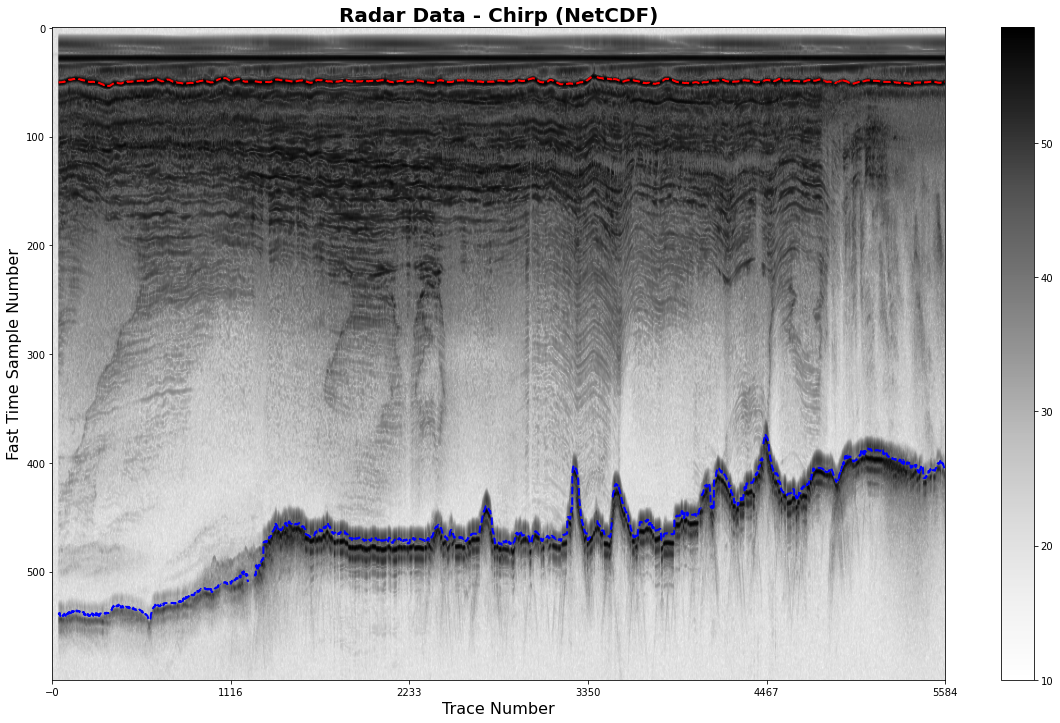

In [333]:
plt.rcParams['figure.figsize'] = [20,12] # set the size of the inline plot

fig1, ax1 = plt.subplots()
radar_im = ax1.imshow(chirpData[:600,:], cmap='Greys', vmin = 10, aspect='auto') # plot data (limit y-axis extent and colorscale)
ax1.plot(surf_pick,'r--', linewidth=2) # plot surface pick
ax1.plot(bed_pick, 'b--', linewidth=2) # plot bed pick 
ax1.xaxis.set_major_locator(ticker.LinearLocator(6)) # set x-axis tick limits

ax1.set_title("Radar Data - Chirp (NetCDF)", fontsize = 20, fontweight = 'bold') # set title
ax1.set_xlabel("Trace Number", fontsize = 16) # set axis title
ax1.set_ylabel("Fast Time Sample Number", fontsize = 16) # set axis title
fig1.colorbar(radar_im, ax = ax1) # plot colorbar

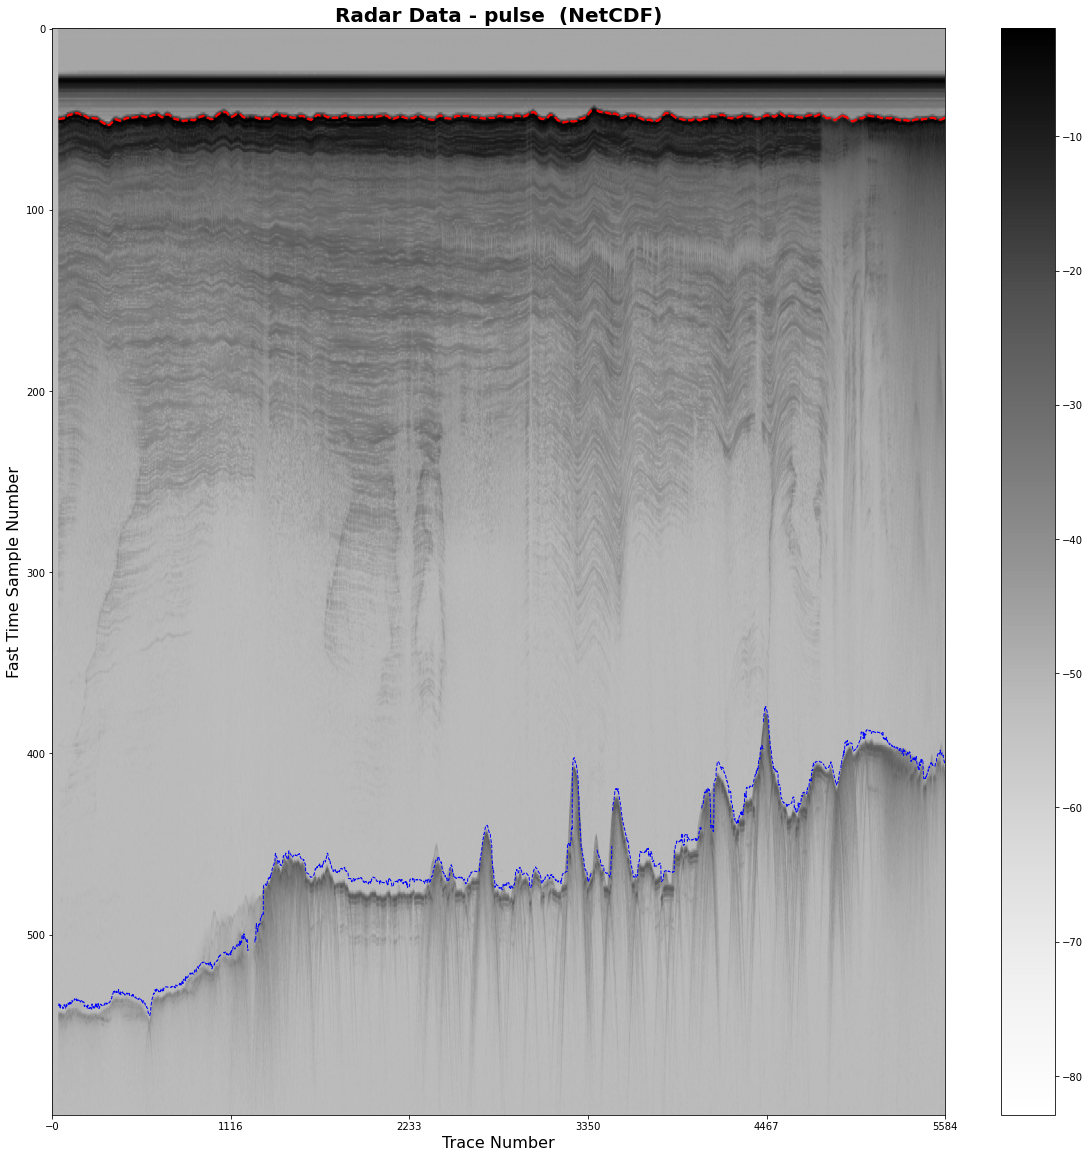

In [334]:
plt.rcParams['figure.figsize'] = [20,20] # set the size of the inline plot

fig2, ax2 = plt.subplots()
radar_im = ax2.imshow(pulseData[:600,:], cmap = 'Greys',  aspect='auto') # plot data (limit y-axis extent and colorscale)
ax2.plot(surf_pick,'r--', linewidth=2) # plot surface pick
ax2.plot(bed_pick, 'b--', linewidth=1) # plot bed pick
ax2.xaxis.set_major_locator(ticker.LinearLocator(6)) # set x-axis tick limits

ax2.set_title("Radar Data - pulse  (NetCDF)", fontsize = 20, fontweight = 'bold') # set title
ax2.set_xlabel("Trace Number", fontsize = 16) # set axis title
ax2.set_ylabel("Fast Time Sample Number", fontsize = 16) # set axis title
fig2.colorbar(radar_im, ax = ax2) # plot colorbar

### Plot amplitude of single trace from the radar data

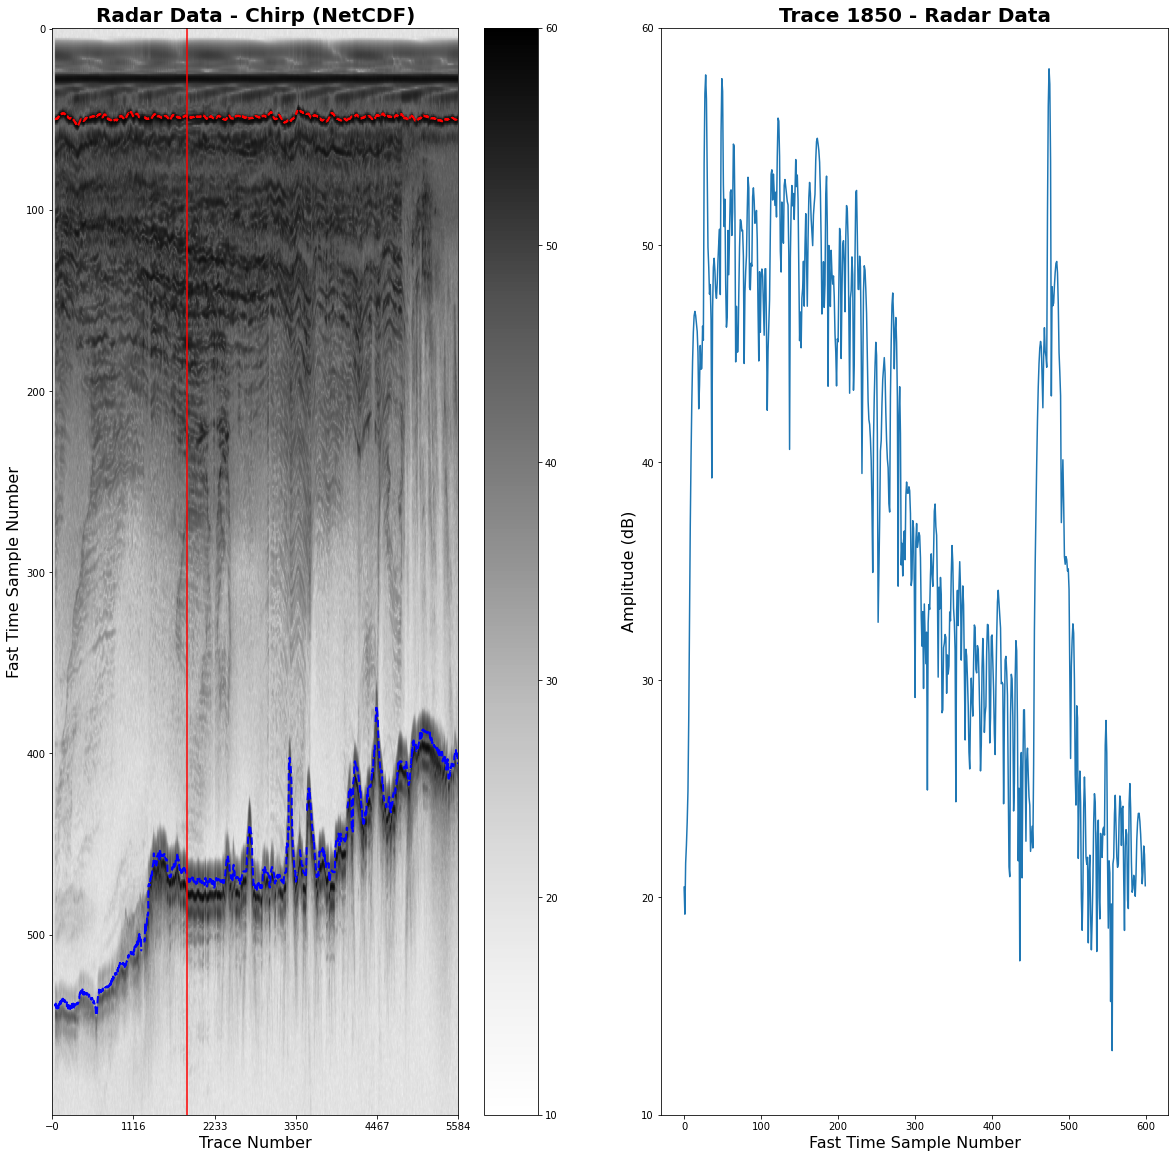

In [331]:
plt.rcParams['figure.figsize'] = [20,20] # set the size of the inline plot
fig2, (ax3, ax4) = plt.subplots(1, 2) # Specify how many plots you want

# first plot the radargram with specific trace marked as red vertical line
radar_im = ax3.imshow(chirpData[:600,:],cmap='Greys', vmin = 10, vmax = 60, aspect='auto') # plot data (limit y-axis extent and colorscale)
ax3.plot(surf_pick,'r--', linewidth=2) # plot surface pick
ax3.plot(bed_pick, 'b--', linewidth=2) # plot surface pick
ax3.xaxis.set_major_locator(ticker.LinearLocator(6)) # set x-axis tick limits
ax3.axvline(x=1850, color='r', linestyle='-') # plot position of trace in second plot
ax3.autoscale(enable=True, axis='x', tight=True) # tighten up x axis

ax3.set_title("Radar Data - Chirp (NetCDF)", fontsize = 20, fontweight = 'bold') # set title
ax3.set_xlabel("Trace Number", fontsize = 16)  # set axis title
ax3.set_ylabel("Fast Time Sample Number", fontsize = 16) # set axis title
fig2.colorbar(radar_im, ax = ax3) # plot colorbar

# then plot trace plot with amplitude and sampling window
ax4.plot(chirpData[:600,1850])
plt.title('Trace 1850 - Radar Data', fontsize = 20, fontweight = 'bold')  # set title
plt.xlabel('Fast Time Sample Number', fontsize = 16) # set axis title
plt.ylabel('Amplitude (dB)', fontsize = 16) # set axis title
plt.ylim([10,60]) # set limit of y-axis
plt.show()


### Plot geographic location of trace on map

Text(0, 0.5, 'Y (km)')

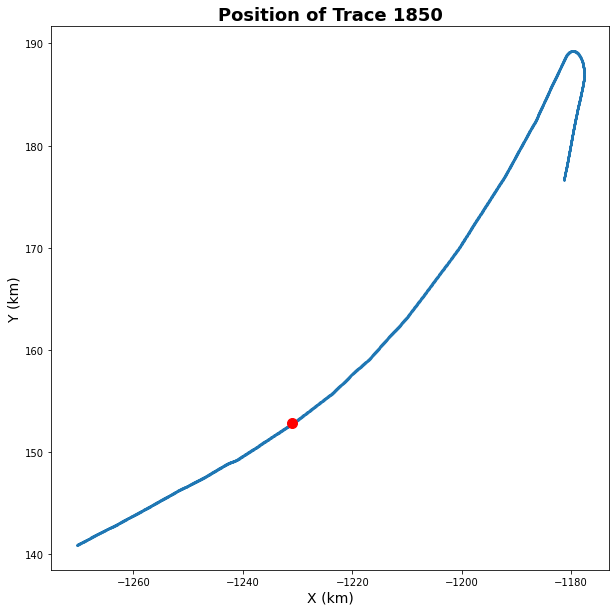

In [304]:
plt.rcParams['figure.figsize'] = [10,10] # Set the size of the inline plot

fig3, ax5 = plt.subplots(1,1)
plt.scatter(x_nc_km, y_nc_km, marker='o', s=1) # plot entire profile
plt.scatter(x_nc_km[1850], y_nc_km[1850], marker='o',color=['red'], s=100) # plot specific trace position as red dot

ax5.set_title("Position of Trace 1850", fontsize = 18, fontweight = 'bold') # set title
ax5.set_xlabel("X (km)", fontsize = 14) # set axis title
ax5.set_ylabel("Y (km)", fontsize = 14) # set axis title

### Plot surface and bed elevations along flightline

Text(0, 0.5, 'Elevation (meters WGS84)')

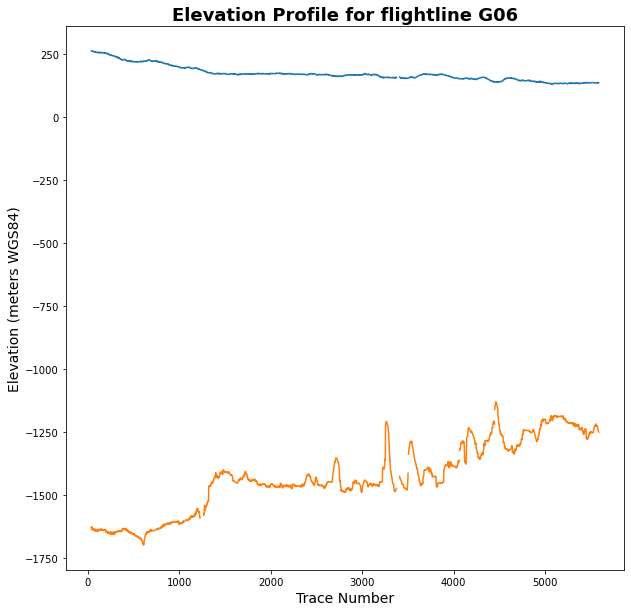

In [332]:
plt.rcParams['figure.figsize'] = [10,10] # Set the size of the inline plot

fig4, ax6 = plt.subplots(1,1)
ax6.plot(traces_nc, surface_elevation) # plot surface elevation for entire profile
ax6.plot(traces_nc, bed_elevation) # plot bed elevation for entire profile

ax6.set_title("Elevation Profile for flightline G06", fontsize = 18, fontweight = 'bold') # set title
ax6.set_xlabel("Trace Number", fontsize = 14) # set axis title
ax6.set_ylabel("Elevation (meters WGS84)", fontsize = 14) # set axis title

## Check the SEG-Y files

### Load the data for chirp and pulse

Give here the path to where the desired files lives on your PC

In [305]:
segy_data_chirp = 'D:/British_Antarctic_Survey/data/GRADES_IMAGE_0607/segy/chirp/G06_chirp.segy'
segy_data_pulse = 'D:/British_Antarctic_Survey/data/GRADES_IMAGE_0607/segy/pulse/G06_pulse.segy'

### Read the SEG-Ys

The data is read using the `_read_segy` command from the `obspy` Python module

In [272]:
segy_chirp = _read_segy(segy_data_chirp, headonly=True)
segy_pulse = _read_segy(segy_data_pulse, headonly=True)

### Inspect SEG-Y parameters 

It is possible to check the content of the SEG-Y bytes using very simple commands of the `obspy` package. 

Some examples are given below for the chirp data (pulse is the same):

In [273]:
segy_chirp

5584 traces in the SEG Y structure.

In [274]:
header_segy = segy_chirp.binary_file_header
header_segy

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 0
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 1000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 1400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 5
	ensemble_fold: 0
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

### Read traces

Obspy can also be used to read individual traces

In [306]:
traces = segy_chirp.traces

We can then have a look at the header of one specific trace, as follows:

In [307]:
trace_header = traces[1].header # for trace 1
trace_header

trace_sequence_number_within_line: 2
trace_sequence_number_within_segy_file: 2
original_field_record_number: 1185400
trace_number_within_the_original_field_record: 1
energy_source_point_number: 2
ensemble_number: 0
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: 0
source_coordinate_x: -1270327
source_coordinate_y: 140859
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_

We can also check the amount of traces in the file (x-axis):

In [277]:
sgy_traces_len = len(segy_chirp.traces)
sgy_traces_len

5584

And check the length of the sampling window (y-axis)

In [278]:
sgy_samples_len = traces[1].header.number_of_samples_in_this_trace
sgy_samples_len

1400

### Plot the processed radargrams

We first need to concatenate all traces from the SEG-Y into one array and calculate the log of data

In [284]:
data_chirp = np.stack(t.data for t in segy_chirp.traces) # concatenate
data_chirp = 10*np.log10(data_chirp) # convert the data from power to decibels using log of data

In [308]:
data_pulse = np.stack(t.data for t in segy_pulse.traces) # concatenate
data_pulse = 10*np.log10(data_pulse) # convert the data from power to decibels using log of data

Now we can plot them:

Text(143.5, 0.5, 'Fast Time Sample Number')

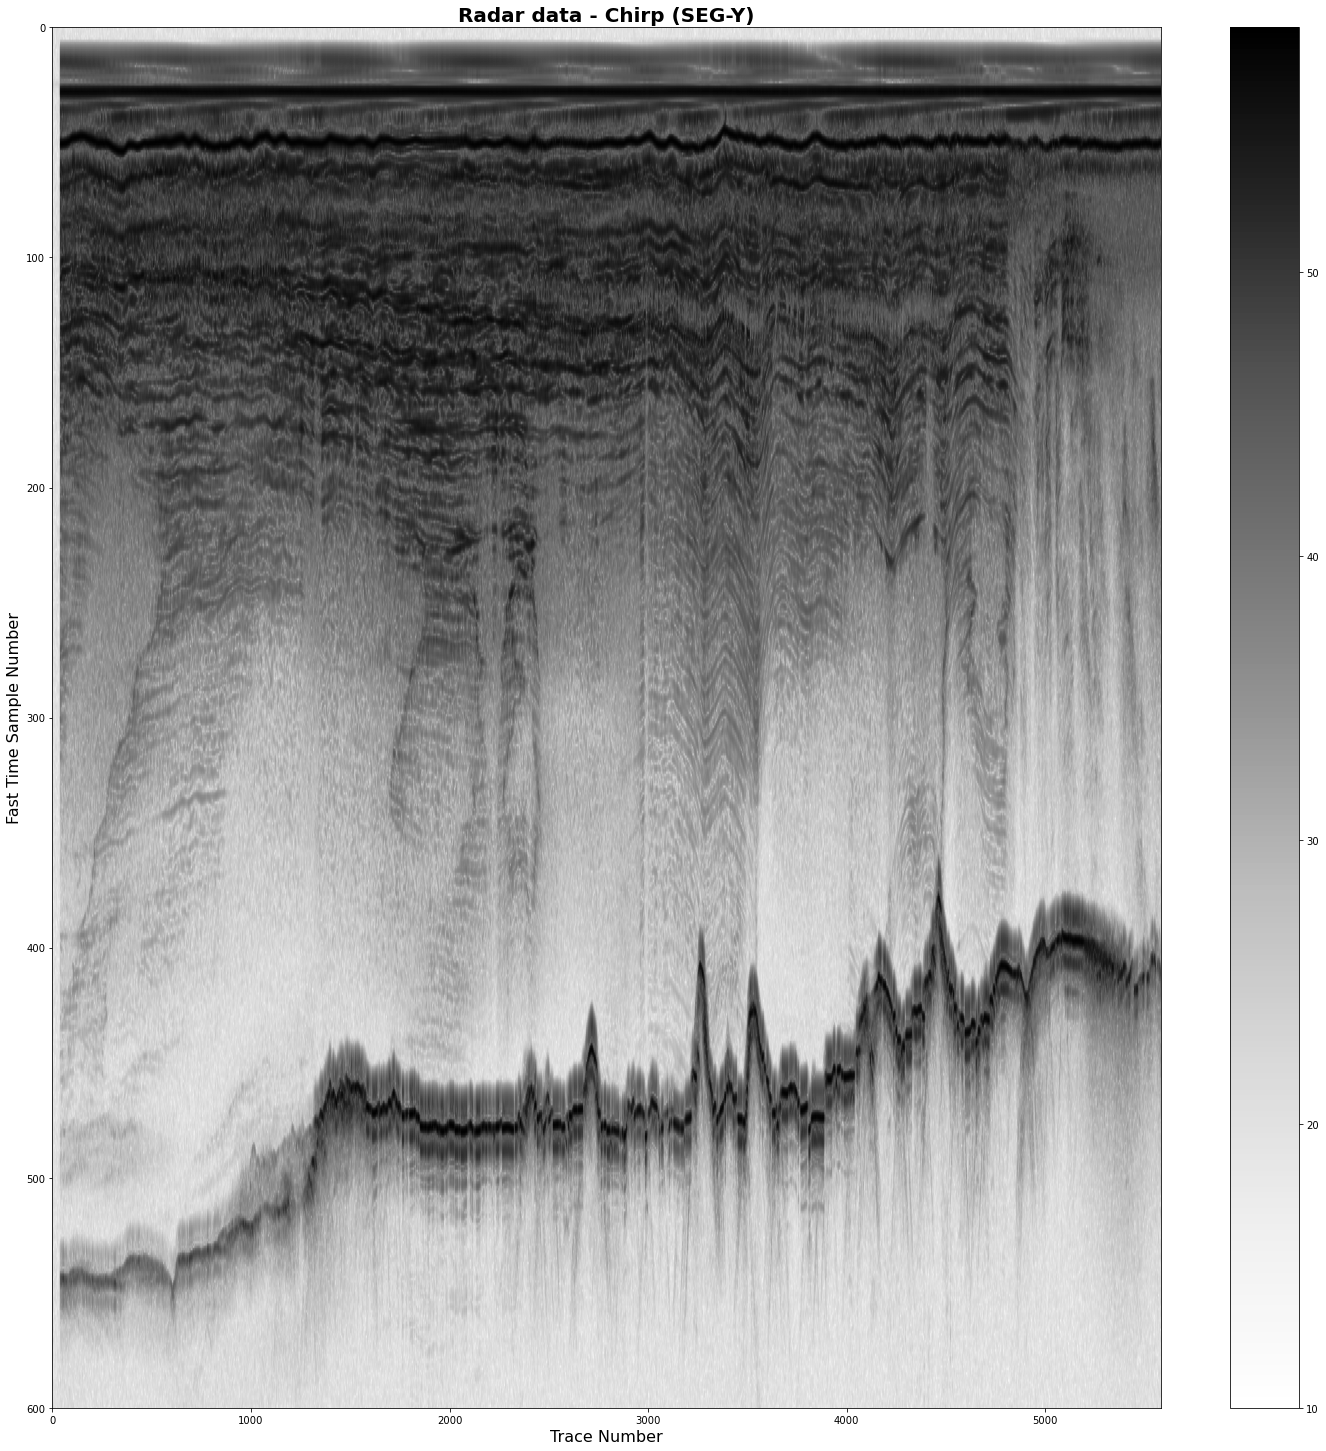

In [281]:
plt.rcParams["figure.figsize"] = (20,20) # set the size of the inline plot

fig4, ax6 = plt.subplots() 
plt.imshow(data_chirp.T, cmap='Greys', vmin = 10, aspect='auto') # plot data (limit colorscale extent)
plt.title('Radar data - Chirp (SEG-Y)', fontsize = 20, fontweight = 'bold') # set title
plt.colorbar() # plot colorbar
plt.tight_layout() # tighten up x axis
plt.ylim([600,0]) # set y-axis limits
ax5.set_xlabel("Trace Number", fontsize = 16) # set axis title
ax5.set_ylabel("Fast Time Sample Number", fontsize = 16) # set axis title

Text(143.5, 0.5, 'Fast Time Sample Number')

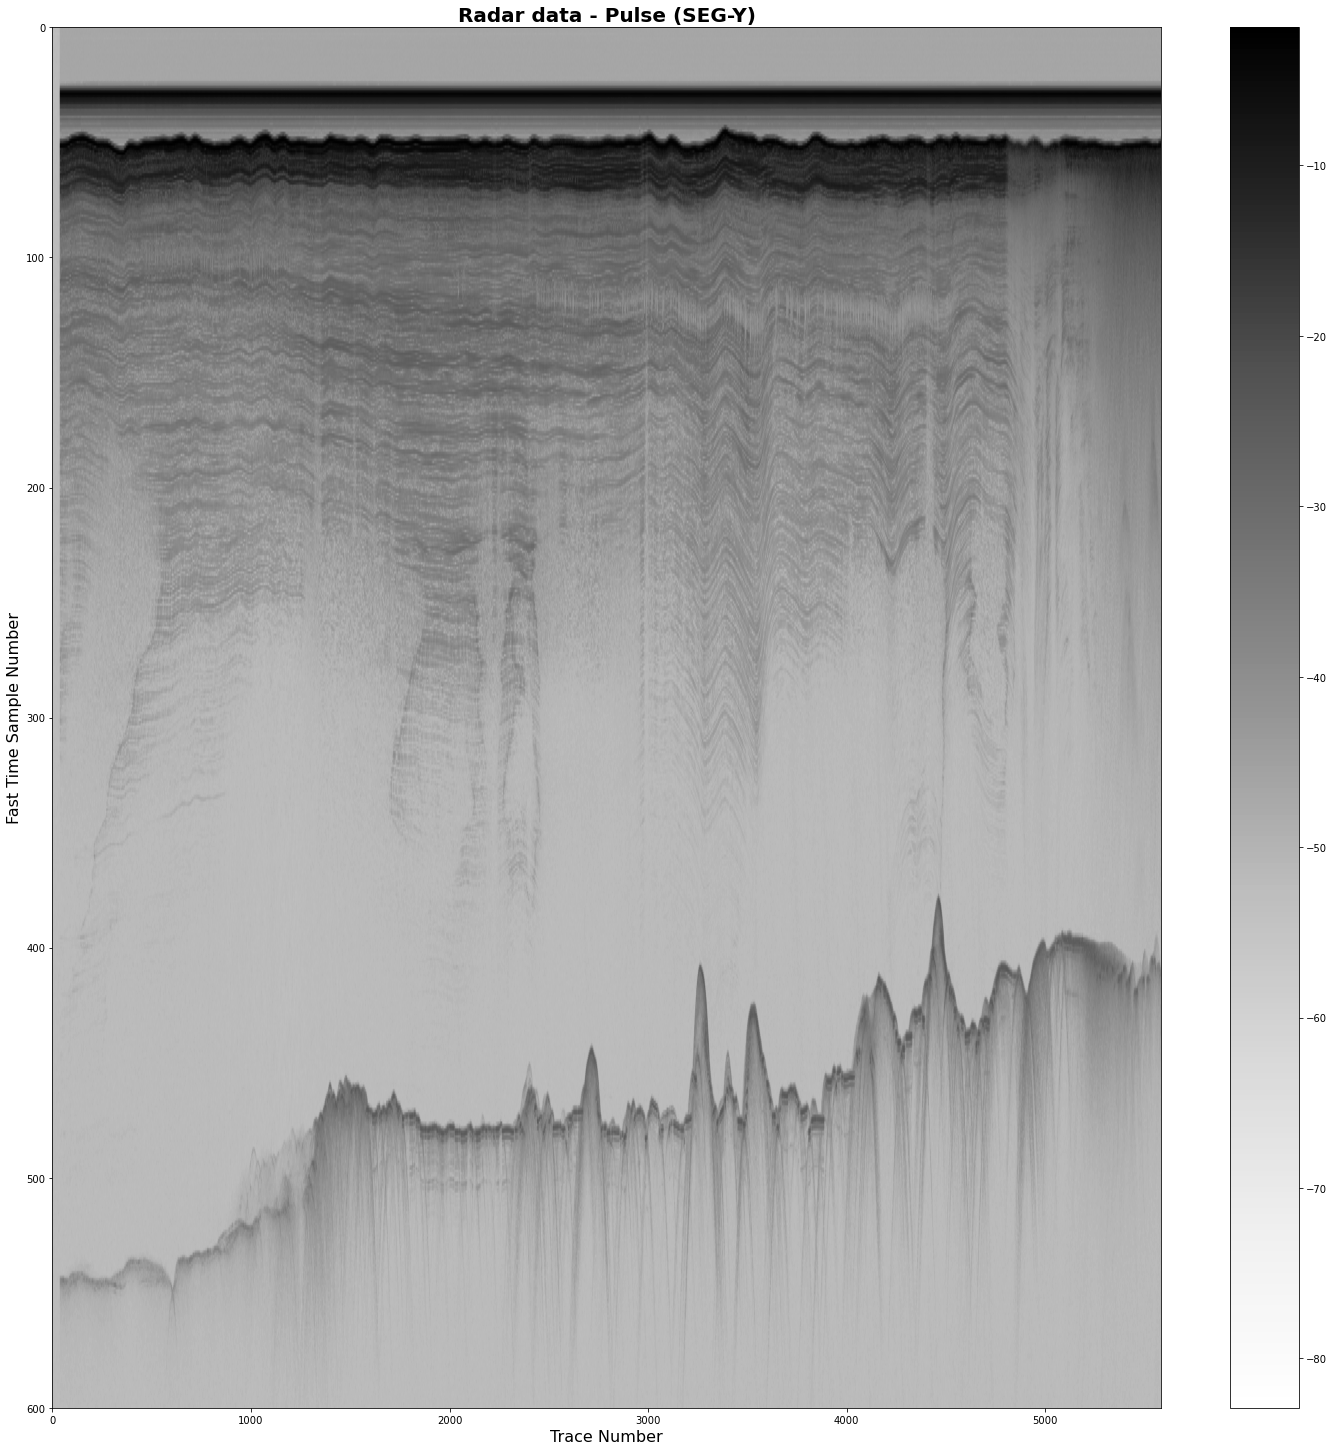

In [282]:
plt.rcParams["figure.figsize"] = (20,20) # set the size of the inline plot

fig5, ax7 = plt.subplots()
plt.imshow(data_pulse.T, cmap='Greys', aspect='auto') # plot data (limit colorscale extent)
plt.title('Radar data - Pulse (SEG-Y)', fontsize = 20, fontweight = 'bold') # set title
plt.colorbar() # plot colorbar
plt.tight_layout() # tighten up x axis
plt.ylim([600,0]) # set y-axis limits
ax6.set_xlabel("Trace Number", fontsize = 16) # set axis title
ax6.set_ylabel("Fast Time Sample Number", fontsize = 16) # set axis title